In [ ]:
#bismillah bisa kelar
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt


##Import Data

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/dataset TA/data_1.xlsx")
df1.rename(columns = {'sentiment':'Sentiment'}, inplace = True)

In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/dataset TA/data_2.xlsx")
df2 #= df2['text', 'Sentiment']

,Unnamed: 0,text,Sentiment
0,1000,Dinas Kesehatan Aceh Utara Usulkan 376.000 Via...,NaN
1,1001,"Gemparkan Warga Langsa, Bayi Perempuan Ditemuk...",NaN
2,1002,Ini Efek yang Langsung Dirasakan Usai Disuntik...,NaN
3,1003,Ayo poling suka-suka santai\n\nJika sekarang a...,NaN
4,1004,Pemkab Aceh Barat Pastikan Imunisasi Vaksin Si...,positif
...,...,...,...
995,1995,Grand Zuri Dumai ikut sukseskan #vaksinasi #co...,NaN
996,1996,#Vaksin #BreakingNews #BREAKING #COVID19 #Coro...,NaN
997,1997,"SIAP DI VAKSIN, Mari Kita sukseskan Vaksinasi ...",positif
998,1998,China Lockdown Lagi Bikin Harga Minyak Dunia L...,NaN


In [ ]:
df3 = pd.read_excel("/content/drive/MyDrive/dataset TA/data_3.xlsx")
df3# = df3['text', 'Sentiment']

,Unnamed: 0,text,Sentiment
0,2000,"Vaksinasi itu pertaruhan. Bisa berhasil, bisa ...",NaN
1,2001,Ketua KPCPEN Airlangga Ingatkan Tetap Disiplin...,NaN
2,2002,Vaksinasi: Telaah Sosilogis\n\n#MUI #Vaksin #V...,NaN
3,2003,#StayHome #dirumahaja #VaksinYoVaksin #vaksina...,NaN
4,2004,Raffi Ahmad Digugat ke Pengadilan Tak Terapkan...,NaN
...,...,...,...
2014,4013,"jangan vaksin saudara-saudara, itu hanya akal-...",negatif
2015,4014,"vaksin itu gajelas asal usulnya, olahraga saja...",negatif
2016,4015,"gamau vaksin ah, permainan bisnis, mending mel...",negatif
2017,4016,"vaksin ga jelas, gw gamau vaksin",negatif


##Menggabungkan ketiga data menjadi satu dataframe

In [ ]:
df = pd.concat([df1,df2,df3])
df.reset_index(drop=True, inplace = True)
df

,Unnamed: 0,text,Sentiment
0,0,vaksin untuk indonesia,positif
1,1,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,positif
2,2,Sistem satu data mendukung Vaksinasi di Indone...,positif
3,3,Siap menerima vaksin covid 19 vaksinhalal vak...,positif
4,4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,positif
...,...,...,...
3950,4013,"jangan vaksin saudara-saudara, itu hanya akal-...",negatif
3951,4014,"vaksin itu gajelas asal usulnya, olahraga saja...",negatif
3952,4015,"gamau vaksin ah, permainan bisnis, mending mel...",negatif
3953,4016,"vaksin ga jelas, gw gamau vaksin",negatif


#Data Preprocessing

In [ ]:
##mengambil data teks dan sentimen
df = pd.DataFrame(df[['text','Sentiment']])
df

,text,Sentiment
0,vaksin untuk indonesia,positif
1,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,positif
2,Sistem satu data mendukung Vaksinasi di Indone...,positif
3,Siap menerima vaksin covid 19 vaksinhalal vak...,positif
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,positif
...,...,...
3950,"jangan vaksin saudara-saudara, itu hanya akal-...",negatif
3951,"vaksin itu gajelas asal usulnya, olahraga saja...",negatif
3952,"gamau vaksin ah, permainan bisnis, mending mel...",negatif
3953,"vaksin ga jelas, gw gamau vaksin",negatif


##menghapus @.. dan hashtag, menghapus url, link, dan karakter spesial

In [ ]:
df['text'] = df['text'].str.replace('(@\w+.*?)',"")
df['text'] = df['text'].str.replace('(#\w+.*?)',"")
df['text'] = df['text'].str.replace('(&\w+.*?)',"")
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df['text'] = df['text'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
df['text'] = df['text'].str.replace(r"[0-9]", '')
df['text'] = df['text'].str.replace(r'  ', ' ')
df['text'] = df['text'].str.replace(r'   ', ' ')
df['text'] = df['text'].str.replace(r"[\,\+\_\-\:\!\%\;\/\\]", ' ')

In [ ]:
#menghapus single char
# remove single char
def remove_singl_char(teks):
    return re.sub(r"\b[a-zA-Z]\b", "", teks)

df['text'] = df['text'].apply(remove_singl_char)

In [ ]:
#remove whitespace
def remove_whitespace_LT(teks):
    return teks.strip()

df['text'] = df['text'].apply(remove_whitespace_LT)

In [ ]:
#remove multiple whitespace
def remove_whitespace_multiple(teks):
    return re.sub('\s+',' ',teks)

df['text'] = df['text'].apply(remove_whitespace_multiple)

In [ ]:
#remove punctuation
def remove_punctuation(teks):
    return teks.translate(str.maketrans("","",string.punctuation))

df['text'] = df['text'].apply(remove_punctuation)

In [ ]:
#mengubah semua huruf menjadi huruf kecil
df['text'] = df['text'].str.lower()
df

,text,Sentiment
0,vaksin untuk indonesia,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
3950,jangan vaksin saudara saudara itu hanya akal a...,negatif
3951,vaksin itu gajelas asal usulnya olahraga saja ...,negatif
3952,gamau vaksin ah permainan bisnis mending melak...,negatif
3953,vaksin ga jelas gw gamau vaksin,negatif


In [ ]:
df['text'] = df['text'].str.replace('\n', ' ')
df['text'] = df['text'].str.replace('...$', '*')

In [ ]:
#menghilangkan teks yang mengandung akhiran titik 3 (contoh: men...)
df_titik_ilang=[]
for i in df.index:
  #re.sub("[A-Za-z0-9]+\.{3}", "", df['text'][i])
  df_titik_ilang.append(re.sub("[A-Za-z0-9]+\*", "", df['text'][i]))

df['text'] = pd.DataFrame(df_titik_ilang)


In [ ]:
df['text'] = df['text'].str.replace('*', '')

In [ ]:
df

,text,Sentiment
0,vaksin untuk,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
3950,jangan vaksin saudara saudara itu hanya akal a...,negatif
3951,vaksin itu gajelas asal usulnya olahraga saja,negatif
3952,gamau vaksin ah permainan bisnis mending melak...,negatif
3953,vaksin ga jelas gw gamau,negatif


##Menghilangkan teks yang tidak memiliki sentimen

In [ ]:
df.isna().sum()

text            0
Sentiment    2592
dtype: int64

In [ ]:
df.loc[df.Sentiment.isna(), :]

,text,Sentiment
9,wakil supervisor kab kota sudah terlatih rumah...,NaN
10,mengenal vaksin,NaN
21,simak yang boleh dan tidak vaksin pandemi indo...,NaN
22,video tenaga kesehatan tolak vaksin viral vaks...,NaN
23,jadi sobatbp sudah terima sms dari kemenkes se...,NaN
...,...,...
3930,status zona pada dua daerah di lampung menurun...,NaN
3932,ketua pbnu wahai kiai dan ustaz covid itu ada ...,NaN
3933,meski vaksin covid saat ini masih diprioritask...,NaN
3934,pemkab tasikmalaya mulai kick off vaksinasi,NaN


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df

,text,Sentiment
0,vaksin untuk,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
1358,jangan vaksin saudara saudara itu hanya akal a...,negatif
1359,vaksin itu gajelas asal usulnya olahraga saja,negatif
1360,gamau vaksin ah permainan bisnis mending melak...,negatif
1361,vaksin ga jelas gw gamau,negatif


##Menghilangkan teks duplikat

In [ ]:
df.text.duplicated().sum()

197

In [ ]:
df.loc[df.text.duplicated(), :]

,text,Sentiment
218,arifinnkri dukung vaksinasi untuk,positif
219,arifinnkri dukung vaksinasi untuk,positif
223,arifinnkri dukung vaksinasi untuk,positif
224,arifinnkri dukung vaksinasi untuk,positif
240,dukung untuk negara,positif
...,...,...
1330,jangan percaya teori konspirasi vaksin ada unt...,positif
1331,vaksin ada untuk kebaikan,positif
1332,vaksinasi merupakan usaha untuk mencegah covid...,positif
1333,covid teratasi ekonomi maju mari kita sukseska...,positif


In [ ]:
df = df.drop_duplicates(subset=["text"])
df.reset_index(drop=True, inplace = True)

In [ ]:
df.text.duplicated().sum()

0

In [ ]:
df.shape

(1166, 2)

In [ ]:
df

,text,Sentiment
0,vaksin untuk,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
1161,jangan vaksin saudara saudara itu hanya akal a...,negatif
1162,vaksin itu gajelas asal usulnya olahraga saja,negatif
1163,gamau vaksin ah permainan bisnis mending melak...,negatif
1164,vaksin ga jelas gw gamau,negatif


##Menghapus semua emmoticon

In [ ]:
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df

,text,Sentiment
0,vaksin untuk,positif
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif
2,sistem satu data mendukung vaksinasi di indone...,positif
3,siap menerima vaksin covid vaksinhalal vaksins...,positif
4,apa perbedaan vaksin china sinovac dan sinopha...,positif
...,...,...
1161,jangan vaksin saudara saudara itu hanya akal a...,negatif
1162,vaksin itu gajelas asal usulnya olahraga saja,negatif
1163,gamau vaksin ah permainan bisnis mending melak...,negatif
1164,vaksin ga jelas gw gamau,negatif


##Melihat data target 

In [ ]:
#label encoding, menjadikan nilai negatif = 0 & positif = 1
df['Target_type']= df['Sentiment'].map({'negatif': 0,'[p':1, 'o':1, 'op':1, 'positif':1})
df

,text,Sentiment,Target_type
0,vaksin untuk,positif,1
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif,1
2,sistem satu data mendukung vaksinasi di indone...,positif,1
3,siap menerima vaksin covid vaksinhalal vaksins...,positif,1
4,apa perbedaan vaksin china sinovac dan sinopha...,positif,1
...,...,...,...
1161,jangan vaksin saudara saudara itu hanya akal a...,negatif,0
1162,vaksin itu gajelas asal usulnya olahraga saja,negatif,0
1163,gamau vaksin ah permainan bisnis mending melak...,negatif,0
1164,vaksin ga jelas gw gamau,negatif,0


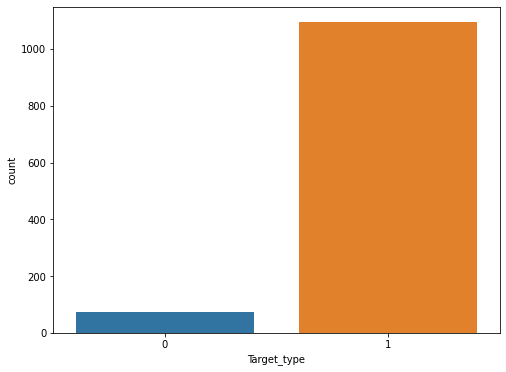

In [ ]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(df.Target_type)

###Dikarenakan data negatif sangat sedikit, maka dilakukan oversampling agar akurasi model dapat ditingkatkan

In [ ]:
#Melakukan Oversampling
df_negatif = df.loc[df.Sentiment == 'negatif']
df_negatif_gabungan = pd.concat([df_negatif,df_negatif,df_negatif,df_negatif])
df_negatif_gabungan.reset_index(drop = True, inplace = True)
df_negatif_gabungan

,text,Sentiment,Target_type
0,tidak usah lah tanyakan mau atau tidak disunti...,negatif,0
1,info boker pagi ini ditemani kopi hitam buatan...,negatif,0
2,heran kenapa masih pakai sinovac lebih mahal i...,negatif,0
3,nih denger tolakdivaksinsinovac,negatif,0
4,abis baca tentang thread vaksin sinovac dr efi...,negatif,0
...,...,...,...
283,jangan vaksin saudara saudara itu hanya akal a...,negatif,0
284,vaksin itu gajelas asal usulnya olahraga saja,negatif,0
285,gamau vaksin ah permainan bisnis mending melak...,negatif,0
286,vaksin ga jelas gw gamau,negatif,0


In [ ]:
#menggabungkan data minor oversampling ke dalam dataset
data_final = pd.concat([df,df_negatif_gabungan])
data_final.reset_index(drop=True, inplace = True)
data_final

,text,Sentiment,Target_type
0,vaksin untuk,positif,1
1,tak kenal maka tak kebal vaksin menjadi bukti ...,positif,1
2,sistem satu data mendukung vaksinasi di indone...,positif,1
3,siap menerima vaksin covid vaksinhalal vaksins...,positif,1
4,apa perbedaan vaksin china sinovac dan sinopha...,positif,1
...,...,...,...
1449,jangan vaksin saudara saudara itu hanya akal a...,negatif,0
1450,vaksin itu gajelas asal usulnya olahraga saja,negatif,0
1451,gamau vaksin ah permainan bisnis mending melak...,negatif,0
1452,vaksin ga jelas gw gamau,negatif,0


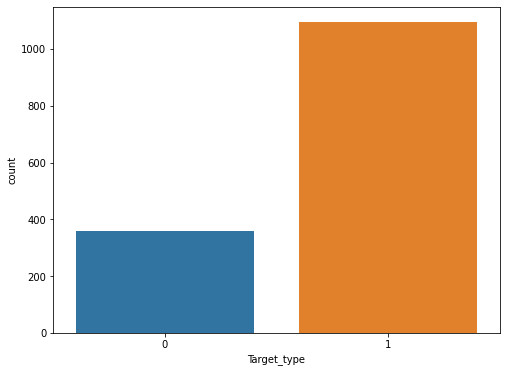

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data_final.Target_type)

##Tokenisasi

In [ ]:
def token(text):
  nstr = text.split(" ")
  dt = []
  a = -1
  for i in nstr:
    a = a + 1
  if i == '':
    dt.append(a)
  p = 0
  b = 0
  for q in dt:
    b = q - p
    del nstr[b]
    p = p + 1
  return nstr

In [ ]:
data_final['text'] = data_final['text'].apply(token)

In [ ]:
data_final

,text,Sentiment,Target_type
0,"[vaksin, untuk]",positif,1
1,"[tak, kenal, maka, tak, kebal, vaksin, menjadi...",positif,1
2,"[sistem, satu, data, mendukung, vaksinasi, di,...",positif,1
3,"[siap, menerima, vaksin, covid, vaksinhalal, v...",positif,1
4,"[apa, perbedaan, vaksin, china, sinovac, dan, ...",positif,1
...,...,...,...
1449,"[jangan, vaksin, saudara, saudara, itu, hanya,...",negatif,0
1450,"[vaksin, itu, gajelas, asal, usulnya, olahraga...",negatif,0
1451,"[gamau, vaksin, ah, permainan, bisnis, mending...",negatif,0
1452,"[vaksin, ga, jelas, gw, gamau]",negatif,0


##Menghapus Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
# read txt stopword using pandas
txt_stopword = pd.read_csv("/content/drive/MyDrive/dataset TA/stopwordbahasa.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_final['text'] = data_final['text'].apply(stopwords_removal) 


data_final['text'].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                             [vaksin]
1    [kenal, kebal, vaksin, bukti, manusia, berjuan...
2    [sistem, data, mendukung, vaksinasi, indonesia...
3    [menerima, vaksin, covid, vaksinhalal, vaksins...
4    [perbedaan, vaksin, china, sinovac, sinopharm,...
5    [obat, selamatkan, nyawa, pasien, ditemukan, i...
6    [vaksin, buatan, tiongkok, orang, tua, suntik,...
7    [kabar, duka, dokter, pribadi, paus, fransisku...
8    [masker, bekas, rawan, tertular, virus, pakai,...
9    [top, news, koran, rakyat, merdeka, jelang, im...
Name: text, dtype: object

##Stemming menggunakan sastrawi

In [ ]:
!pip install Sastrawi
!pip install swifter
#import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_final['text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_final['text'] = data_final['text'].swifter.apply(get_stemmed_term)
print(data_final['text'])

2005
------------------------
vaksin : vaksin
kenal : kenal
kebal : kebal
bukti : bukti
manusia : manusia
berjuang : juang
menjaga : jaga
eksistensinya : eksistensi
dunia : dunia
sistem : sistem
data : data
mendukung : dukung
vaksinasi : vaksinasi
indonesia : indonesia
covid : covid
menerima : terima
vaksinhalal : vaksinhalal
vaksinsiappropinsi : vaksinsiappropinsi
perbedaan : beda
china : china
sinovac : sinovac
sinopharm : sinopharm
merek : merek
perusahaanfarmasi : perusahaanfarmasi
obat : obat
selamatkan : selamat
nyawa : nyawa
pasien : pasien
ditemukan : temu
infus : infus
virus : virus
wabah : wabah
buatan : buat
tiongkok : tiongkok
orang : orang
tua : tua
suntik : suntik
nonton : nonton
video : video
kabar : kabar
duka : duka
dokter : dokter
pribadi : pribadi
paus : paus
fransiskus : fransiskus
meninggal : tinggal
akibat : akibat
vatikan : vatikan
pausfransiskus : pausfransiskus
masker : masker
bekas : bekas
rawan : rawan
tertular : tular
pakai : pakai
utk : utk
mencegah : cegah

Pandas Apply:   0%|          | 0/1454 [00:00<?, ?it/s]

0                                                [vaksin]
1       [kenal, kebal, vaksin, bukti, manusia, juang, ...
2       [sistem, data, dukung, vaksinasi, indonesia, v...
3       [terima, vaksin, covid, vaksinhalal, vaksinsia...
4       [beda, vaksin, china, sinovac, sinopharm, mere...
                              ...                        
1449    [vaksin, saudara, saudara, akal, akal, elite, ...
1450                    [vaksin, gajelas, usul, olahraga]
1451    [gamau, vaksin, ah, main, bisnis, mending, akt...
1452                              [vaksin, ga, gw, gamau]
1453                       [vaksin, gaes, mending, tidur]
Name: text, Length: 1454, dtype: object


#Permodelan


In [ ]:
# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, regularizers,initializers
from sklearn.model_selection import StratifiedKFold 

#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
X = data_final['text'].values
y = data_final['Target_type'].values

In [ ]:
X

array([list(['vaksin']),
       list(['kenal', 'kebal', 'vaksin', 'bukti', 'manusia', 'juang', 'jaga', 'eksistensi', 'dunia', 'vaksin']),
       list(['sistem', 'data', 'dukung', 'vaksinasi', 'indonesia', 'vaksin', 'covid']),
       ...,
       list(['gamau', 'vaksin', 'ah', 'main', 'bisnis', 'mending', 'aktivitas']),
       list(['vaksin', 'ga', 'gw', 'gamau']),
       list(['vaksin', 'gaes', 'mending', 'tidur'])], dtype=object)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Split data into train, val and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train

array([list(['pandemi', 'kasih', 'kendor', 'patuh', 'protokol', 'sehat']),
       list(['selesai', 'pandemi', 'menteri', 'sandi', 'ajak', 'insan', 'pariwisata']),
       list(['vaksinasi', 'tenaga', 'sehat', 'surabaya']), ...,
       list(['vaksin', 'saudara', 'saudara', 'akal', 'akal', 'elite']),
       list(['juru', 'ngmng', 'vaksinasi', 'covid', 'siti', 'nadia', 'tarmizi', 'yg', 'bhw', 'dkng', 'vaksinasi', 'jng', 'kendor', 'protokol']),
       list(['bpom', 'pasti', 'lapor', 'vaksin', 'covid', 'rusak'])],
      dtype=object)

In [ ]:
# Defining parameters
max_len = 80
trunc_type = "post" # 80 Kata Pertama.. "pre" -> 80 Kata Terakhir
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 14202 #jumlah maksimum kata yang disimpan

# embedding_dim = 16
# drop_value = 0.2 

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level = False, oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

In [ ]:
# Get the word_index by using tokenizer
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'vaksin': 2,
 'vaksinasi': 3,
 'covid': 4,
 'indonesia': 5,
 'suntik': 6,
 'sinovac': 7,
 'sehat': 8,
 'dukung': 9,
 'program': 10,
 'aman': 11,
 'pandemi': 12,
 'halal': 13,
 'yg': 14,
 'takut': 15,
 'perintah': 16,
 'masyarakat': 17,
 'presiden': 18,
 'percaya': 19,
 'sukses': 20,
 'tolak': 21,
 '': 22,
 'gamau': 23,
 'jokowi': 24,
 'gak': 25,
 'bisnis': 26,
 'tahap': 27,
 'terima': 28,
 'lawan': 29,
 'laksana': 30,
 'mari': 31,
 'mending': 32,
 'aja': 33,
 'virus': 34,
 'bpom': 35,
 'ribka': 36,
 'bebas': 37,
 'dosis': 38,
 'protokol': 39,
 'jarum': 40,
 'moga': 41,
 'elite': 42,
 'ayo': 43,
 'upaya': 44,
 'yuk': 45,
 'lindung': 46,
 'negara': 47,
 'ragu': 48,
 'corona': 49,
 'dr': 50,
 'ya': 51,
 'jalan': 52,
 'joko': 53,
 'orang': 54,
 'kalo': 55,
 'cegah': 56,
 'saudara': 57,
 'akal': 58,
 'uji': 59,
 'nan': 60,
 'rakyat': 61,
 'ri': 62,
 'mui': 63,
 'tubuh': 64,
 'bentuk': 65,
 'ikut': 66,
 'tjiptaning': 67,
 'denda': 68,
 'gratis': 69,
 'terap': 70,
 'badan': 71,


In [ ]:
# Sequencing and padding on training and testing 
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

train_padded = pad_sequences(train_sequences, maxlen = max_len, padding = padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen = max_len, padding = padding_type, truncating=trunc_type)

In [ ]:
print('Shape of train tensor: ', train_padded.shape)
print('Shape of test tensor: ', test_padded.shape)

Shape of train tensor:  (1163, 80)
Shape of test tensor:  (291, 80)


In [ ]:
# Before padding
print(len(train_sequences[0]), len(train_sequences[1]))
print(len(test_sequences[0]), len(test_sequences[1]))

6 7
7 9


In [ ]:
# After padding
print(len(train_padded[0]), len(train_padded[1]))
print(len(test_padded[0]), len(test_padded[1]))

80 80
80 80


In [ ]:
print(train_padded)

[[ 12  73 260 ...   0   0   0]
 [109  12 125 ...   0   0   0]
 [  3  92   8 ...   0   0   0]
 ...
 [  2  57  57 ...   0   0   0]
 [159 696   3 ...   0   0   0]
 [ 35 169 464 ...   0   0   0]]


In [ ]:
print(test_padded)

[[  9  16 103 ...   0   0   0]
 [422 542 249 ...   0   0   0]
 [ 21   6   2 ...   0   0   0]
 ...
 [  2 457 203 ...   0   0   0]
 [ 23   2 118 ...   0   0   0]
 [ 31  20   3 ...   0   0   0]]


In [ ]:
embeding_dim = 16

In [ ]:
vocab_size


14202

In [ ]:
len(word_index) + 1

1442

In [ ]:
#Dense model architecture -> Bidirectional
model = models.Sequential()
model.add(layers.Embedding(vocab_size, embeding_dim,input_length=max_len)) # Layer Input
model.add(layers.LSTM(100))
model.add(layers.Dense(1,activation='sigmoid')) # Hidden 3

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 16)            227232    
                                                                 
 lstm_1 (LSTM)               (None, 100)               46800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 274,133
Trainable params: 274,133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])
# Loss = rumus menghitung besarnya perbedaan antara target hasil dari deep learning dengan target asli
# Optimizer = Rumus yang dipakai untuk deep learning memperbagus diri setiap kali epoch(latihan)

In [ ]:
#Stratified K Fold
num_epochs = 32 #32 Kali Latihan
early_stop = EarlyStopping(monitor="val_loss",patience = 2) # 

kf = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

for train_index, val_index in kf.split(train_padded, y_train):
    x_train_kf, x_val_kf = train_padded[train_index], train_padded[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]
    
    history = model.fit(x_train_kf, 
                    y_train_kf, 
                    epochs=num_epochs,
                    validation_data=(x_val_kf,y_val_kf),
                    callbacks = [early_stop],
                    verbose=1)

Epoch 1/32
25/25 [==============================] - 6s 115ms/step - loss: 0.6306 - accuracy: 0.7342 - val_loss: 0.6100 - val_accuracy: 0.7526
Epoch 2/32
25/25 [==============================] - 3s 138ms/step - loss: 0.5858 - accuracy: 0.7523 - val_loss: 0.5646 - val_accuracy: 0.7526
Epoch 3/32
25/25 [==============================] - 4s 143ms/step - loss: 0.5664 - accuracy: 0.7523 - val_loss: 0.5632 - val_accuracy: 0.7526
Epoch 4/32
25/25 [==============================] - 4s 151ms/step - loss: 0.5639 - accuracy: 0.7523 - val_loss: 0.5614 - val_accuracy: 0.7526
Epoch 5/32
25/25 [==============================] - 4s 145ms/step - loss: 0.5641 - accuracy: 0.7523 - val_loss: 0.5595 - val_accuracy: 0.7526
Epoch 6/32
25/25 [==============================] - 4s 166ms/step - loss: 0.5639 - accuracy: 0.7523 - val_loss: 0.5597 - val_accuracy: 0.7526
Epoch 7/32
25/25 [==============================] - 4s 161ms/step - loss: 0.5610 - accuracy: 0.7523 - val_loss: 0.5610 - val_accuracy: 0.7526
Epoch 

In [ ]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns = {'loss':'Training_Loss', 'accuracy':"Training_Accuracy", 'val_loss':'Validation_Loss', 'val_accuracy':"Validation_Accuracy"}, inplace = True)


In [ ]:
def plot_graphs1(var1,var2,string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel('Number of Epochs')
    plt.ylabel(string)
    plt.legend([var1,var2])

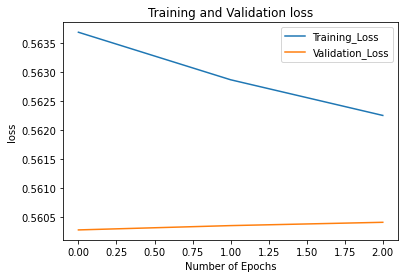

In [ ]:
plot_graphs1('Training_Loss','Validation_Loss', 'loss')

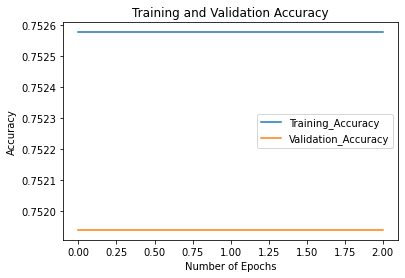

In [ ]:
plot_graphs1('Training_Accuracy','Validation_Accuracy', 'Accuracy')

In [ ]:
pred = (model.predict(test_padded)>0.5).astype("int32")
acc = model.evaluate(test_padded, y_test)
proba_nn = model.predict(test_padded)

print("Test loss is {0:.2f} accuracyc is {1:.2f} ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

10/10 [==============================] - 0s 21ms/step - loss: 0.5597 - accuracy: 0.7526
Test loss is 0.56 accuracyc is 0.75 
[[  0   0]
 [ 72 219]]


Text(0.5, 15.0, 'Actual')

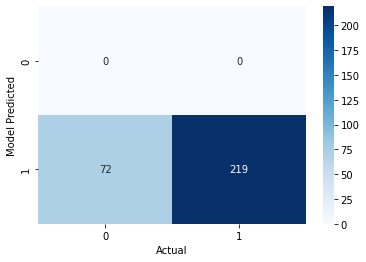

In [ ]:
cf_matrix = confusion_matrix(pred,y_test)
sns.heatmap(cf_matrix,annot=True, fmt='',cmap='Blues')
plt.ylabel('Model Predicted')
plt.xlabel('Actual')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred,target_names=['negatif','positif']))
#y_pred = np.argmax(model.predict(X_test),axis=-1)
#y_test_class = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        72
     positif       0.75      1.00      0.86       219

    accuracy                           0.75       291
   macro avg       0.38      0.50      0.43       291
weighted avg       0.57      0.75      0.65       291



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
